In [6]:
import pandas as pd
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt

In [7]:
DATA_PATH = "../markup/data_female.csv"
INFO_PATH = "../markup/data_female_raiting.csv"
POOL_PATH = "../resourses"

SAMPLE_RATE = 16000
AUDIO_LENGTH = 10

In [207]:
info = pd.read_csv(INFO_PATH)

info

,author,voice,L,R,raiting,validation
0,07ee6576b8ed9dc7d66c18a0b618e202,pool_31406799_14-02-2022_13-22-34/assignment_0...,139472,299472,0,True
1,dc293f9d7e805325e42b58f942d5abff,pool_31406799_14-02-2022_13-22-34/assignment_0...,443135,603135,0,True
2,7970c2dd76e091324c93c50f799ff30f,pool_31546723_14-02-2022_13-23-16/assignment_0...,1738140,1898140,0,True
3,b7a0f701963fa8db5fd6c5a3efe18b65,pool_31546723_14-02-2022_13-23-16/assignment_0...,419260,579260,0,True
4,29f8b5f60b436d0e371161cf7e634961,pool_31546723_14-02-2022_13-23-16/assignment_0...,1695567,1855567,0,True
...,...,...,...,...,...,...
141,5ef451b5c81a75cd4f056305b49e9d44,pool_31406799_14-02-2022_13-22-34/assignment_0...,2739367,2899367,3,False
142,5c7147c3086e9859d8865c0a6e40adaf,pool_31546723_14-02-2022_13-23-16/assignment_0...,534505,694505,3,False
143,bfc72c14fa93434422fa6e9bd8d99db5,pool_31546723_14-02-2022_13-23-16/assignment_0...,1368507,1528507,3,False
144,cad6174856b01bcd90802afc7b26a36a,pool_31406799_14-02-2022_13-22-34/assignment_0...,1414175,1574175,3,False


In [8]:
data = pd.read_csv(DATA_PATH)
data = data[data["result"] != 0].reset_index(drop=True)

data

,author_first,voice_first,L_first,R_first,author_second,voice_second,L_second,R_second,result,validation
0,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,ca8310d799b2d05cddbaccd8b5643b5b,pool_31546723_14-02-2022_13-23-16/assignment_0...,742817,902817,1,True
1,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,417163f3e47e0898097d9db1203ece89,pool_31406799_14-02-2022_13-22-34/assignment_0...,622897,782897,1,True
2,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,bea83f439f3a5f391b39a058ec1a6b0e,pool_31406799_14-02-2022_13-22-34/assignment_0...,1639451,1799451,1,True
3,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,b0cdde51ed794209697bbb9f2b9697bf,pool_31546723_14-02-2022_13-23-16/assignment_0...,1157004,1317004,1,True
4,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,31f7071b2a859d86b6d05ab13dc9b004,pool_31546723_14-02-2022_13-23-16/assignment_0...,964620,1124620,1,True
...,...,...,...,...,...,...,...,...,...,...
2026,73c74c6b6412a083aa56a2fd2633fa11,pool_31406799_14-02-2022_13-22-34/assignment_0...,113468,273468,83ea422cd776bd51762c13ebad8bb826,pool_31546723_14-02-2022_13-23-16/assignment_0...,1525375,1685375,1,False
2027,73c74c6b6412a083aa56a2fd2633fa11,pool_31406799_14-02-2022_13-22-34/assignment_0...,113468,273468,7bea39239ec7d24a550a54c2ae891b2b,pool_31406799_14-02-2022_13-22-34/assignment_0...,152014,312014,1,False
2028,73c74c6b6412a083aa56a2fd2633fa11,pool_31406799_14-02-2022_13-22-34/assignment_0...,113468,273468,9ac5b2f3ac92a5d7f873e40a5b85c790,pool_31406799_14-02-2022_13-22-34/assignment_0...,67055,227055,1,False
2029,73c74c6b6412a083aa56a2fd2633fa11,pool_31406799_14-02-2022_13-22-34/assignment_0...,113468,273468,97dda75d5c65a8cba812fcff6da24186,pool_31546723_14-02-2022_13-23-16/assignment_0...,487944,647944,1,False


In [9]:
data_rows = []
for idx, row in data.iterrows():
    cur = row
    if cur["result"] < 0:
        cur["author_first"], cur["author_second"] = cur["author_second"], cur["author_first"]
        cur["voice_first"], cur["voice_second"] = cur["voice_second"], cur["voice_first"]
        cur["L_first"], cur["L_second"] = cur["L_second"], cur["L_first"]
        cur["R_first"], cur["R_second"] = cur["R_second"], cur["R_first"]
    data_rows.append(cur)
data_formated = pd.DataFrame(data_rows, columns=list(data.columns))
data_formated.drop(columns=["result"], inplace=True)

data_formated

,author_first,voice_first,L_first,R_first,author_second,voice_second,L_second,R_second,validation
0,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,ca8310d799b2d05cddbaccd8b5643b5b,pool_31546723_14-02-2022_13-23-16/assignment_0...,742817,902817,True
1,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,417163f3e47e0898097d9db1203ece89,pool_31406799_14-02-2022_13-22-34/assignment_0...,622897,782897,True
2,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,bea83f439f3a5f391b39a058ec1a6b0e,pool_31406799_14-02-2022_13-22-34/assignment_0...,1639451,1799451,True
3,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,b0cdde51ed794209697bbb9f2b9697bf,pool_31546723_14-02-2022_13-23-16/assignment_0...,1157004,1317004,True
4,d48454e63c864e07dfda93e619447c05,pool_31546723_14-02-2022_13-23-16/assignment_0...,603149,763149,31f7071b2a859d86b6d05ab13dc9b004,pool_31546723_14-02-2022_13-23-16/assignment_0...,964620,1124620,True
...,...,...,...,...,...,...,...,...,...
2026,73c74c6b6412a083aa56a2fd2633fa11,pool_31406799_14-02-2022_13-22-34/assignment_0...,113468,273468,83ea422cd776bd51762c13ebad8bb826,pool_31546723_14-02-2022_13-23-16/assignment_0...,1525375,1685375,False
2027,73c74c6b6412a083aa56a2fd2633fa11,pool_31406799_14-02-2022_13-22-34/assignment_0...,113468,273468,7bea39239ec7d24a550a54c2ae891b2b,pool_31406799_14-02-2022_13-22-34/assignment_0...,152014,312014,False
2028,73c74c6b6412a083aa56a2fd2633fa11,pool_31406799_14-02-2022_13-22-34/assignment_0...,113468,273468,9ac5b2f3ac92a5d7f873e40a5b85c790,pool_31406799_14-02-2022_13-22-34/assignment_0...,67055,227055,False
2029,73c74c6b6412a083aa56a2fd2633fa11,pool_31406799_14-02-2022_13-22-34/assignment_0...,113468,273468,97dda75d5c65a8cba812fcff6da24186,pool_31546723_14-02-2022_13-23-16/assignment_0...,487944,647944,False


In [10]:
from tqdm.notebook import tqdm 
import warnings

audiofiles = dict()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for idx, row in tqdm(list(data_formated.iterrows())):
        for number in ["first", "second"]:
            voice = row[f"voice_{number}"]
            if voice not in audiofiles:
                audiofiles[voice] = librosa.load(os.path.join(POOL_PATH, voice), sr=SAMPLE_RATE)[0]

  0%|          | 0/2031 [00:00<?, ?it/s]

In [11]:
def get_audio(idx, row):
    try: 
        return audiofiles[row[f"voice_{idx}"]]
    except FileNotFoundError:
        print("FileNotFoundError", idx, row[f"voice_{idx}"])
        raise

def get_audio_LR(idx, row):
    try: 
        return get_audio(idx, row)[row[f"L_{idx}"]: row[f"R_{idx}"]]
    except FileNotFoundError:
        pass

In [12]:
data_train = pd.DataFrame(data_formated.loc[~data["validation"]], columns=data_formated.columns)
data_train = data_train.reset_index(drop=True)

data_test = pd.DataFrame(data_formated.loc[data["validation"]], columns=data_formated.columns).reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

print("Validation size %.3f, train size %.3f" % (len(data_test) / len(data), len(data_train) / len(data)))

Validation size 0.284, train size 0.716


In [13]:
%load_ext autoreload
%autoreload 2

In [14]:
import sys
sys.path.append('..')

In [15]:
import torch
import utils.feature_generators as fgen

from torch.utils.data import DataLoader
from collections import defaultdict
from utils.feature_usage import FeatureExtractor, SoundDataset
from utils.model_evaluation import Evaluator

In [16]:
temp_feature_generator = fgen.TempFeatureGenerator()
denoiser = fgen.Denoiser()

Using cache found in /Users/voidmax/.cache/torch/hub/facebookresearch_denoiser_main


In [175]:
# feature_extractor = FeatureExtractor(
#     get_audio_LR, transform=denoiser.denoise, 
#     feature_family=[
#         (temp_feature_generator, [
#             "temp_letters", "temp_words"
#         ]),
#         (fgen.SimpleFeatureGenerator(), [
#             "audio_zcr", "audio_rmse", "audio_entropy"
#         ]),
#         (fgen.SreFeatureGenerator(), [
#             "f0_mean", "f0_std", "f0_mean_der", "loudness_mean", "loudness_std", "loudness_mean_der"
#         ]),
#         (fgen.LibrosaFeatureGenerator(), [
#             "librosa_mfccs_mean", "librosa_rms_mean", "librosa_chroma_mean", "librosa_centroid_mean", 
#             "librosa_tonnetz_mean", "librosa_chroma_cens_mean", "librosa_spec_bw_mean", "librosa_flatness_mean", 
#         ])
#     ]
# )

feature_extractor = FeatureExtractor(
    get_audio_LR, transform=denoiser.denoise, 
    feature_family=[
        (temp_feature_generator, [
            "temp_letters", 
            # "temp_words"
        ]),
        (fgen.SimpleFeatureGenerator(), [
            "audio_zcr", "audio_rmse", "audio_entropy"
        ]),
        (fgen.SreFeatureGenerator(), [
            "f0_mean", "f0_std", "f0_mean_der", "loudness_mean", "loudness_std", "loudness_mean_der"
        ]),
        (fgen.LibrosaFeatureGenerator(), [
            "librosa_mfccs_mean", "librosa_rms_mean", "librosa_chroma_mean", "librosa_centroid_mean", 
            "librosa_tonnetz_mean", "librosa_chroma_cens_mean", "librosa_spec_bw_mean", "librosa_flatness_mean", 
        ])
    ]
)

In [176]:
dataset_train = SoundDataset(data_train, feature_extractor, cache_path="cache/features_train.csv")
dataloader_train = DataLoader(dataset_train, batch_size=1, shuffle=True)
evaluator_train = Evaluator(dataset_train, INFO_PATH)

dataset_test = SoundDataset(data_test, feature_extractor, cache_path="cache/features_test.csv")
dataloader_test = DataLoader(dataset_test, batch_size=1, shuffle=True)
evaluator_test = Evaluator(dataset_test, INFO_PATH)

for d in tqdm(dataloader_train):
    pass
dataset_train.cache_save()

for d in tqdm(dataloader_test):
    pass
dataset_test.cache_save()

  0%|          | 0/1455 [00:00<?, ?it/s]

  0%|          | 0/576 [00:00<?, ?it/s]

In [199]:
X, y = [], []
for idx, row in info.iterrows():
    audio_key = (row["voice"], row["L"], row["R"]) 
    cache = dataset_train._feature_cache
    if row["validation"]:
        cache = dataset_test._feature_cache
    
    X.append(feature_extractor.feature_extraction(audio_key, cache).numpy())
    y.append(row["raiting"])

X = pd.DataFrame(X, columns=feature_extractor.get_feature_names())
y = pd.Series(y)

X_train, y_train = X[~info["validation"]], y[~info["validation"]]
X_test, y_test = X[info["validation"]], y[info["validation"]]

In [200]:
CROSS_VALIDATION_SIZE = 5

authors = set()
for idx, row in data_train.iterrows():
    authors.add(row["author_first"])
    authors.add(row["author_second"])
authors = list(authors)
authors = np.array(authors).reshape(CROSS_VALIDATION_SIZE, -1)

cross_data_train = []
cross_dataset_train = []
cross_dataloader_train = []
cross_evaluator_train = []
cross_X_train = []
cross_y_train = []
cross_X_valid = []
cross_y_valid = []

for i in range(CROSS_VALIDATION_SIZE):
    current = data_train.copy()
    for author in authors[i]:
        current = current[(current["author_first"] != author) & (current["author_second"] != author)]
    current = current.reset_index(drop=True)

    cross_data_train.append(current)
    cross_dataset_train.append(SoundDataset(current, feature_extractor, cache_path="cache/features_train.csv"))
    cross_dataloader_train.append(DataLoader(cross_dataset_train[-1], batch_size=1, shuffle=True))
    cross_evaluator_train.append(Evaluator(cross_dataset_train[-1], INFO_PATH))

    cX_train, cy_train = [], []
    cX_valid, cy_valid = [], []
    for (_, info_row), (idx, row), y in zip(info[~info["validation"]].iterrows(), X_train.iterrows(), y_train):
        if info_row["author"] in authors[i]:
            cX_valid.append(row.values)
            cy_valid.append(y)
        else:
            cX_train.append(row.values)
            cy_train.append(y)

    cross_X_train.append(pd.DataFrame(cX_train, columns=X.columns))
    cross_y_train.append(pd.Series(cy_train))
    cross_X_valid.append(pd.DataFrame(cX_valid, columns=X.columns))
    cross_y_valid.append(pd.Series(cy_valid))

In [133]:
import optuna
from catboost import CatBoostRegressor

class CatBoostPredictor:
    def __init__(self, **params):
        self.models = []
        for i in range(CROSS_VALIDATION_SIZE):
            boosting = CatBoostRegressor(verbose=False, **params)
            boosting.fit(cross_X_train[i], cross_y_train[i], eval_set=[(cross_X_valid[i], cross_y_valid[i])])
            self.models.append(boosting)

    def predict(self, X):
        X = np.array(X)
        result = None
        for m in self.models:
            if result is not None:
                result += m.predict(X)
            else:
                result = m.predict(X)
        return np.array(result / len(self.models))

def my_objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 1, 100, log=True)
    l2_leaf_reg = trial.suggest_float("l2_leaf_reg", 0.01, 1000, log=True)
    learning_rate = trial.suggest_float("learning_rate", 0.001, 0.5, log=True)
    max_depth = trial.suggest_int("max_depth", 2, 5)

    scores = []
    for _ in range(5):
        for i in range(CROSS_VALIDATION_SIZE):
            boosting = CatBoostRegressor(n_estimators=n_estimators, 
                                        learning_rate=learning_rate, 
                                        l2_leaf_reg=l2_leaf_reg,
                                        max_depth=max_depth, 
                                        verbose=False
            )
            boosting.fit(cross_X_train[i], cross_y_train[i], eval_set=[(cross_X_valid[i], cross_y_valid[i])])
            scores.append(np.abs(boosting.predict(cross_X_valid[i]).reshape(-1) - cross_y_valid[i]).mean())
    return np.mean(scores) / 3

study = optuna.create_study()
study.optimize(my_objective, n_jobs=1, n_trials=200, show_progress_bar=True)

[I 2022-05-27 19:56:05,133] A new study created in memory with name: no-name-ed150f53-d8e5-4321-be5f-1c5d5dc5fe80
/usr/local/lib/python3.9/site-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/200 [00:00<?, ?it/s]

[I 2022-05-27 19:56:10,397] Trial 0 finished with value: 0.26524142620043206 and parameters: {'n_estimators': 15, 'l2_leaf_reg': 0.9609161364668648, 'learning_rate': 0.03601844149239845, 'max_depth': 3}. Best is trial 0 with value: 0.26524142620043206.
[I 2022-05-27 19:56:13,224] Trial 1 finished with value: 0.27596702246520843 and parameters: {'n_estimators': 1, 'l2_leaf_reg': 0.09843725940072472, 'learning_rate': 0.15301621430785084, 'max_depth': 5}. Best is trial 0 with value: 0.26524142620043206.
[I 2022-05-27 19:56:16,674] Trial 2 finished with value: 0.28647780072832413 and parameters: {'n_estimators': 4, 'l2_leaf_reg': 544.1683834266781, 'learning_rate': 0.008163221626862817, 'max_depth': 3}. Best is trial 0 with value: 0.26524142620043206.
[I 2022-05-27 19:56:19,629] Trial 3 finished with value: 0.27221788330646174 and parameters: {'n_estimators': 1, 'l2_leaf_reg': 0.010406959935819811, 'learning_rate': 0.20135263437093678, 'max_depth': 5}. Best is trial 0 with value: 0.2652414

In [201]:
class CatBoostPredictor:
    def __init__(self, **params):
        self.models = []
        for i in range(CROSS_VALIDATION_SIZE):
            boosting = CatBoostRegressor(verbose=False, **params)
            boosting.fit(cross_X_train[i], cross_y_train[i], eval_set=[(cross_X_valid[i], cross_y_valid[i])])
            self.models.append(boosting)

    def predict(self, X):
        X = np.array(X)
        result = None
        for m in self.models:
            if result is not None:
                result += m.predict(X)
            else:
                result = m.predict(X)
        return np.array(result / len(self.models))

model = CatBoostPredictor(**study.best_params)

In [202]:
np.abs(model.predict(X_test) - y_test).mean() / 3

0.28598845392668043

In [204]:
np.sqrt((((model.predict(X_test) - y_test) / 3)**2).mean())

0.3414615617522387

In [189]:
np.abs(model.predict(X_е) - y_train).mean() / 3

0.13503143141941634

In [206]:
evaluator_test.evaluate(model.predict)
evaluator_test.kendall_coefficients()

0.48677248677248675

In [174]:
ans = []

for d in tqdm(dataloader_test):
    v1 = model.predict(d[0])[0]
    v2 = model.predict(d[1])[0]
    ans.append(v1 > v2)

print(np.mean(ans))

  0%|          | 0/576 [00:00<?, ?it/s]

0.6979166666666666


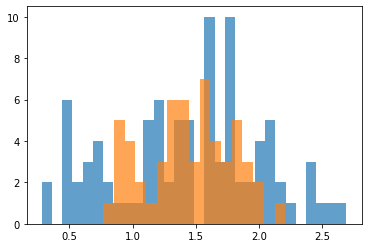

In [212]:
plt.hist(model.predict(X_train), bins=30, label="train", alpha=0.7)
plt.hist(model.predict(X_test), bins=17, label="test", alpha=0.7)
plt.show()